Link PDF A3:
https://mediacdns3.ulife.com.br/PAT/Upload/5408418/ProjetoFinalA3DesenvolvimentodeumAgenteInteligente_20241030193928.pdf

                   Accuracy  Precision    Recall  F1 Score
KNN                0.913004   1.000000  0.348993  0.517413
Árvore de Decisão  0.968610   0.907143  0.852349  0.878893
Random Forest      0.981166   1.000000  0.859060  0.924188


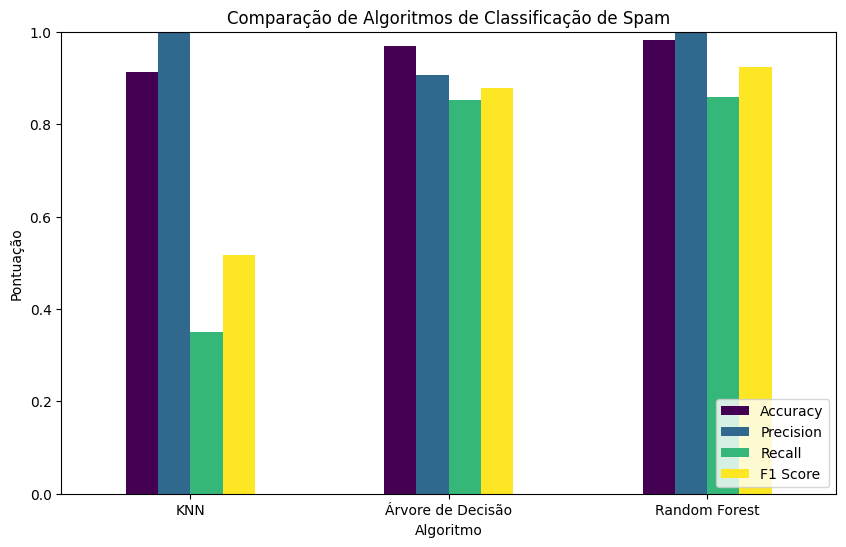

                                                    Accuracy  Precision  \
n_estimators=50,\n max_depth=10,\n min_samples_...  0.898655        1.0   
n_estimators=100,\n max_depth=20,\n min_samples...  0.951570        1.0   
n_estimators=200,\n max_depth=30,\n min_samples...  0.965919        1.0   
n_estimators=100,\n max_depth=None,\n min_sampl...  0.981166        1.0   

                                                      Recall  F1 Score  
n_estimators=50,\n max_depth=10,\n min_samples_...  0.241611  0.389189  
n_estimators=100,\n max_depth=20,\n min_samples...  0.637584  0.778689  
n_estimators=200,\n max_depth=30,\n min_samples...  0.744966  0.853846  
n_estimators=100,\n max_depth=None,\n min_sampl...  0.859060  0.924188  


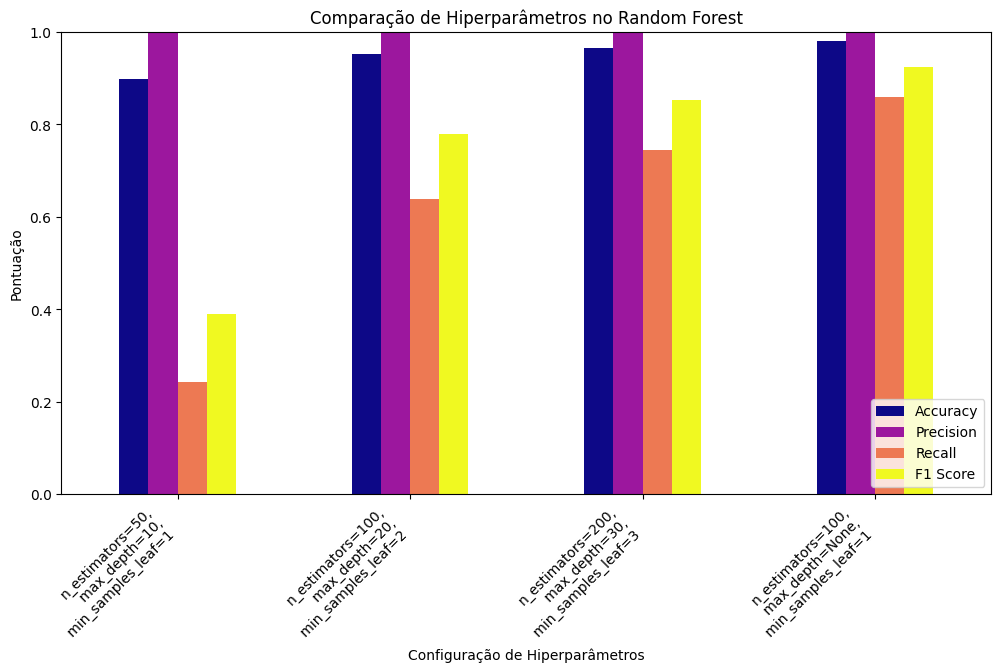

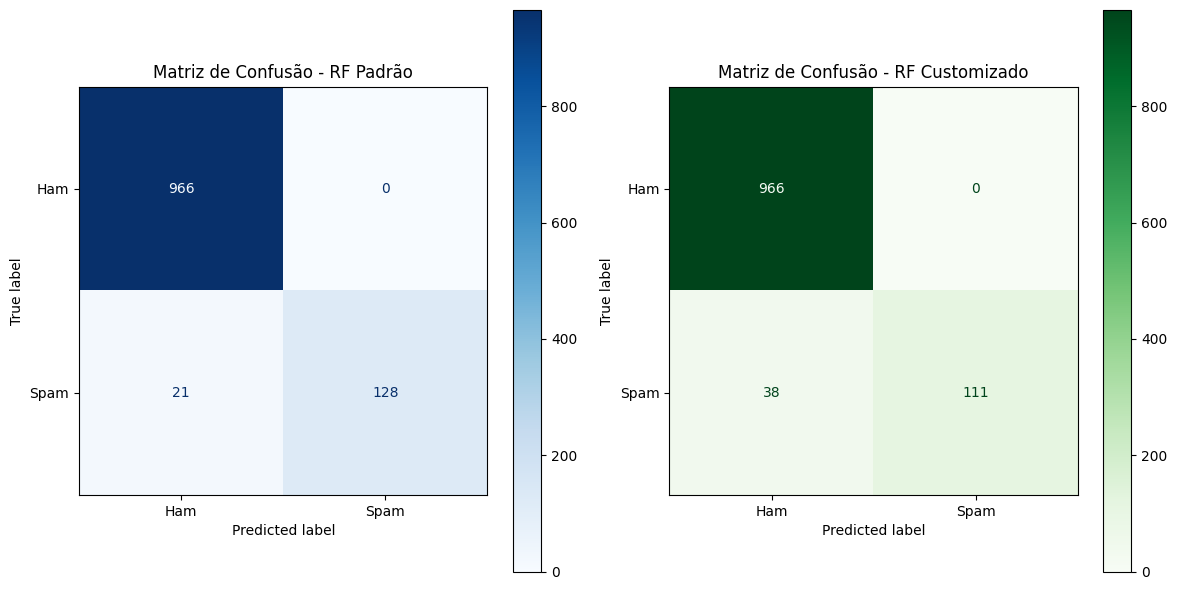

In [20]:
# Importação das bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Carregamento e preparação dos dados
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42
)

tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 2. Treinamento e avaliação com diferentes algoritmos
def avaliar_modelo(modelo, X_train, y_train, X_test, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
    }

modelos = {
    "KNN": KNeighborsClassifier(),
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
}

resultados_modelos = {nome: avaliar_modelo(modelo, X_train_tfidf, y_train, X_test_tfidf, y_test)
                      for nome, modelo in modelos.items()}

df_resultados = pd.DataFrame(resultados_modelos).T
print(df_resultados)

df_resultados.plot(kind='bar', figsize=(10, 6), ylim=(0, 1), colormap='viridis')
plt.title("Comparação de Algoritmos de Classificação de Spam")
plt.xlabel("Algoritmo")
plt.ylabel("Pontuação")
plt.legend(loc="lower right")
plt.xticks(rotation=0)
plt.show()

# 3. Comparação de hiperparâmetros no Random Forest
hiperparametros_rf = [
    {"n_estimators": 50, "max_depth": 10, "min_samples_leaf": 1},
    {"n_estimators": 100, "max_depth": 20, "min_samples_leaf": 2},
    {"n_estimators": 200, "max_depth": 30, "min_samples_leaf": 3},
    {"n_estimators": 100, "max_depth": None, "min_samples_leaf": 1},
]

resultados_rf = {
    f"n_estimators={p['n_estimators']},\n max_depth={p['max_depth']},\n min_samples_leaf={p['min_samples_leaf']}":
    avaliar_modelo(
        RandomForestClassifier(
            n_estimators=p['n_estimators'], max_depth=p['max_depth'],
            min_samples_leaf=p['min_samples_leaf'], random_state=42
        ),
        X_train_tfidf, y_train, X_test_tfidf, y_test
    )
    for p in hiperparametros_rf
}

df_resultados_rf = pd.DataFrame(resultados_rf).T
print(df_resultados_rf)

df_resultados_rf.plot(kind='bar', figsize=(12, 6), ylim=(0, 1), colormap='plasma')
plt.title("Comparação de Hiperparâmetros no Random Forest")
plt.xlabel("Configuração de Hiperparâmetros")
plt.ylabel("Pontuação")
plt.legend(loc="lower right")
plt.xticks(rotation=45, ha="right")
plt.show()

# 4. Matriz de confusão entre random forest padrão e modificado por hiperparâmetros
y_pred_padrao = modelos["Random Forest"].predict(X_test_tfidf)

rf_custom = RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_leaf=3, random_state=42)
rf_custom.fit(X_train_tfidf, y_train)
y_pred_custom = rf_custom.predict(X_test_tfidf)

cm_padrao = confusion_matrix(y_test, y_pred_padrao)
cm_custom = confusion_matrix(y_test, y_pred_custom)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

ConfusionMatrixDisplay(cm_padrao, display_labels=["Ham", "Spam"]).plot(ax=axes[0], cmap="Blues")
axes[0].set_title("Matriz de Confusão - RF Padrão")

ConfusionMatrixDisplay(cm_custom, display_labels=["Ham", "Spam"]).plot(ax=axes[1], cmap="Greens")
axes[1].set_title("Matriz de Confusão - RF Customizado")

plt.tight_layout()
plt.show()
